<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_voting/blob/main/Voting_Catherine's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catherine's Part

# CLEANING, TRANSFORING, EDA
## merging datasets, data overview graphs, etc.

In [1]:
! git clone https://github.com/Catherine-Nguyen88/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 248 (delta 85), reused 132 (delta 72), pack-reused 90
Receiving objects: 100% (248/248), 70.74 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (121/121), done.
Updating files: 100% (68/68), done.


In [2]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

In [23]:
import pandas as pd
df = pd.read_csv('/content/project_voting/voting_est.csv')
df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,...,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over
0,2008,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,7607,15623,...,1446,1316,727,638,369,690,806,791,441,412
1,2008,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,7833,15623,...,1446,1316,727,638,369,690,806,791,441,412
2,2008,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,183,15623,...,1446,1316,727,638,369,690,806,791,441,412
3,2008,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29792,50984,...,3889,3840,1251,1468,1038,1161,1884,1546,1470,1269
4,2008,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,JOHN MCCAIN,REPUBLICAN,20576,50984,...,3889,3840,1251,1468,1038,1161,1884,1546,1470,1269


In [24]:
# look at column names to see what we have narrowed down too
df.columns

Index(['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
       'candidate', 'party', 'candidatevotes', 'totalvotes', 'mode',
       'Not Hispanic or Latino: White alone',
       'Not Hispanic or Latino: Black or African American alone',
       'Not Hispanic or Latino: American Indian and Alaska Native alone',
       'Not Hispanic or Latino: Asian alone',
       'Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone',
       'Not Hispanic or Latino: Two or more races', 'Hispanic or Latino',
       'No schooling completed', 'Regular high school diploma',
       'GED or alternative credential', 'Some college, less than 1 year',
       'Some college, 1 or more years, no degree', 'Associate's degree',
       'Bachelor's degree', 'Master's degree', 'Professional school degree',
       'Doctorate degree', 'Under .50', '.50 to .99', '1.00 to 1.24',
       '1.25 to 1.49', '1.50 to 1.84', '1.85 to 1.99', '2.00 and over',
       'Male: 18 and 19 years', 'Mal

# Net Vote Count: we want to find net vote count at the county level, {Total Republican}-{Total Democrat}

In [33]:
# this is the final df we are using
net_count = pd.read_csv('/content/project_voting/net_votes.csv')
net_count.head(10)

# rename to df
df = net_count
df.head()

,index,year,state,state_po,county_name,county_fips,office,candidatevotes,totalvotes,mode,...,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,Total Republican,Total Democrat,Net Vote
0,0,2008,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,7607,15623,TOTAL,...,638,369,690,806,791,441,412,7833,7607,226
1,3,2008,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,29792,50984,TOTAL,...,1468,1038,1161,1884,1546,1470,1269,20576,29792,-9216
2,6,2008,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,3553,7369,TOTAL,...,400,216,391,398,282,302,308,3715,3553,162
3,9,2008,VIRGINIA,VA,AMELIA,51007,US PRESIDENT,2488,6529,TOTAL,...,450,159,230,245,191,97,187,3970,2488,1482
4,12,2008,VIRGINIA,VA,AMHERST,51009,US PRESIDENT,6094,14700,TOTAL,...,662,494,468,722,609,390,460,8470,6094,2376


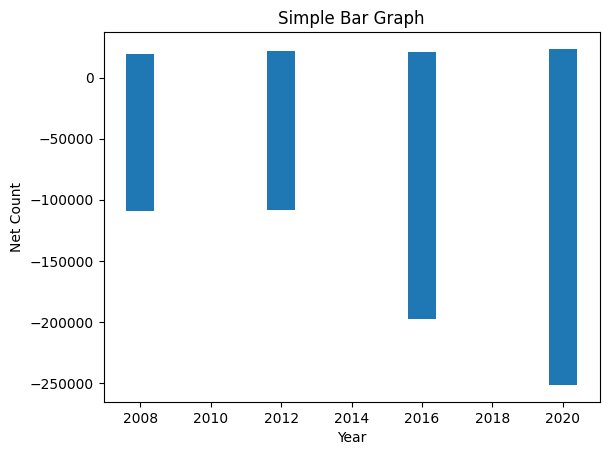

In [34]:
# graphs to show net vote count compared to other variables
import matplotlib.pyplot as plt

# Sample data
x = df['year']
y = df['Net Vote']

# Create the bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Net Count')
plt.title('Simple Bar Graph')

# Show the plot
plt.show()



# graphs to show net vote count over the years
# need year and Net Vote columns
# across diff counties
# race, education, income, gender

Bar Graph conclusion: When looking at Virginia data, summing up the total republican votes and total democrat votes and subtracting them gives the net vote count. If the difference is positive, that means that Republicans won and if the difference is negative that means Democrats won for that given year. Looking at the graph above across election years 2008, 2012, 2016, and 2020, the net vote counts is negative meaning Virginia voted Democrats in these given election years. It seems that over the 12 years, Virginia has voted more Democrat as seen by the increasing rate (net count doubles in size from 2008 to 2020).

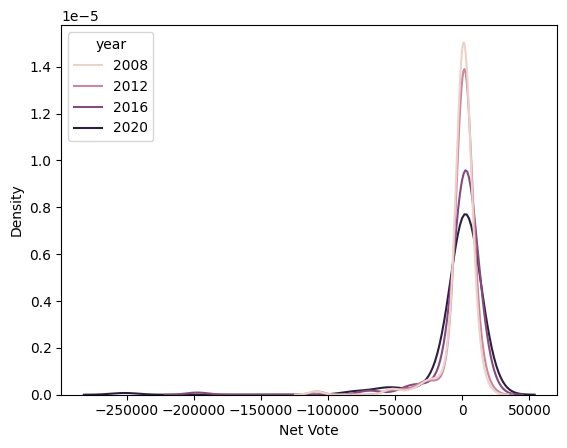

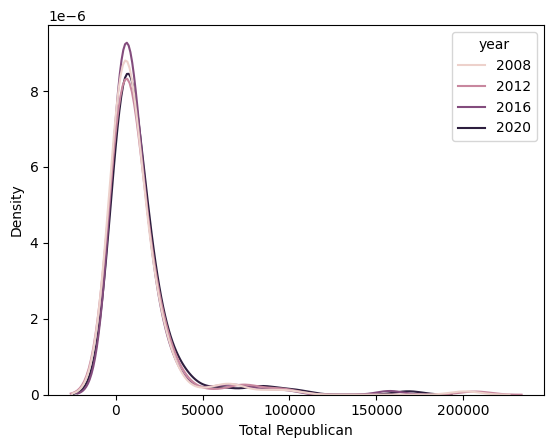

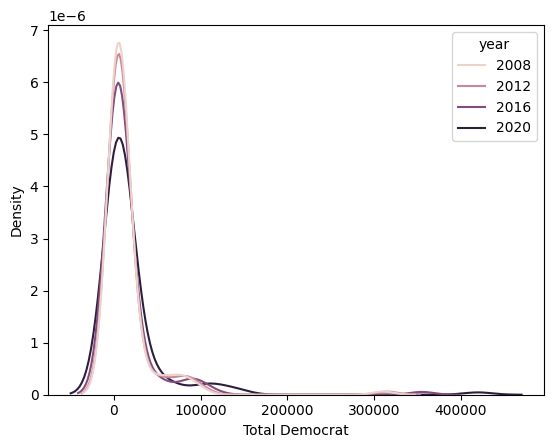

In [35]:
import seaborn as sns

# kde plot of year vs. Net Vote, Total Republican, Total Democrat
sns.kdeplot(data=df, x='Net Vote', hue = 'year')
plt.show()

sns.kdeplot(data=df, x='Total Republican', hue = 'year')
plt.show()

sns.kdeplot(data=df, x='Total Democrat', hue = 'year')
plt.show()

KDE plot (set 1) conclusion: The following KDE plots graph net votes, total repblican votes and total democrats vots across the election years. As seen in the non-transformed graphs, there is one peak centered around zero and then as the values spread out there are smaller peaks that are less readable. Looking at net vote counts, it is hard to see smaller changes in the graph without scaling it by taking arcsinh of "Net Count". To fix readability, the next graphs will represent the same data, with net votes rescaled.

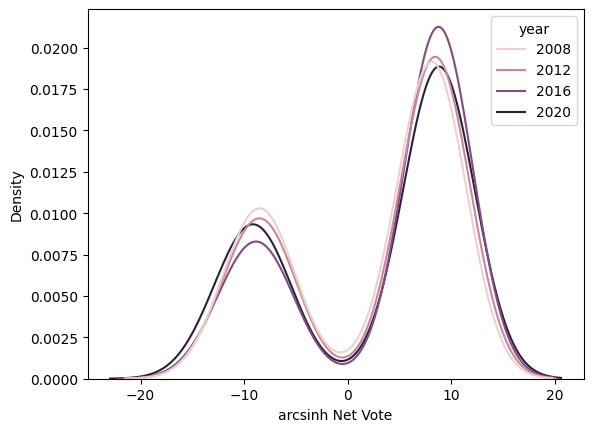

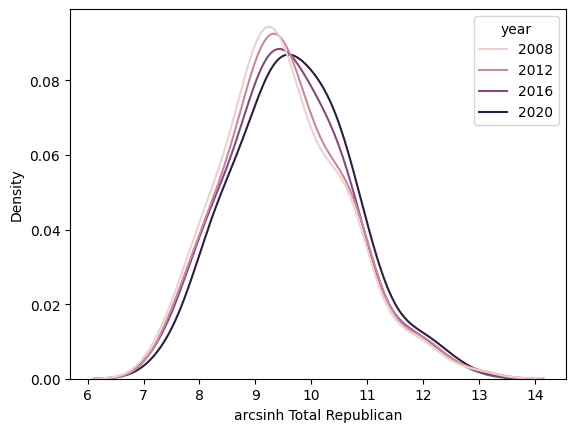

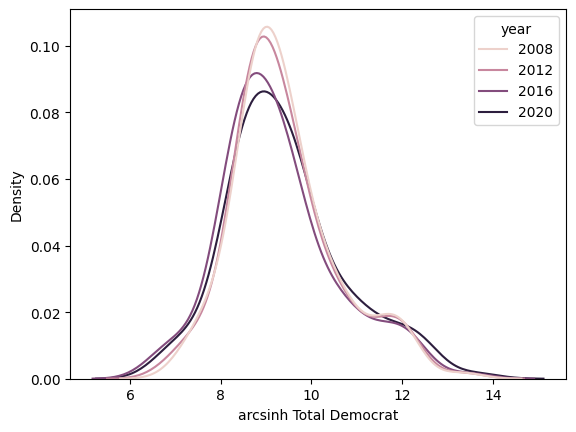

In [38]:
# take arcsinh of Net Vote (rescale it and make it easier for regressions and trees to fit the realized range of values)

df['arcsinh Net Vote'] = np.arcsinh(df['Net Vote'])
sns.kdeplot(data=df, x='arcsinh Net Vote', hue='year')
plt.show()


df['arcsinh Total Republican'] = np.arcsinh(df['Total Republican'])
sns.kdeplot(data=df, x='arcsinh Total Republican', hue='year')
plt.show()


df['arcsinh Total Democrat'] = np.arcsinh(df['Total Democrat'])
sns.kdeplot(data=df, x='arcsinh Total Democrat', hue='year')
plt.show()

KDE plot (set 2) conclusion: The following KDE plots graph net votes, total republican votes and total democrats votes across the election years, rescaled by arcsinh. When applying arcsinh, a large value (postive or negative) will be compressed and small value will be expanded. Readability improves as seen by the obvious peaks in the graphs verses the nontransformed graphs that had small peaks that were almost indistinguishable unless carefully looking. More specifically, the bimodal graph that arcsinh net vote creates shows that there are two main counts that had the highest proportion consistently across all elections years. It also appears that when looking at this graph, no one year dominated at the peak showing that there isn't an obvious trend as to how net vote counts has changed over the years.

# TREES

In [ ]:
# Process data:
y = df['Price']
#y =  np.log(df['Price']) # Compare with and without logs
vars = ['Beds','Number Of Reviews']
X = pd.concat([df.loc[:,vars], type_dummy, nbhd_dummy, room_dummy],axis=1)

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression
var_names = cart.feature_names_in_

# Visualize results:
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Residuals, Rsq, RMSE
e = y_test - y_hat
sns.kdeplot(e) # Notice the residuals aren't centered around zero
plt.show()
rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

In [ ]:
county.head()